<h2 align = center> PROYECTO INTEGRADOR </h2>

INCLUIR UNA INTRODUCCION

#### Importamos las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Tools as t
from datetime import datetime
from summarytools import dfSummary
import Tools as t

#### Se extraen los datos a dataframes de pandas

In [2]:
df_homicidios = pd.read_excel('data/homicidios.xlsx', sheet_name='HECHOS')
df_homicidios.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
df_victimas = pd.read_excel('data/homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Normalizamos los nombres de las columnas de ambos dataframes, para hacer más sencillo el manejo de los datos

In [4]:
df_homicidios.columns = ['idSiniestro','NumVictimas','Fecha','Anio','Mes','Dia','Hora','H','LugarHecho','TipoDeCalle','Calle','Altura','Cruce','DireccionNormalizada','Comuna','XYplana','PosX','PosY','Participantes','Victima','Acusado']
df_homicidios.head()

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_victimas.columns = ['idSiniestro','Fecha','Anio','Mes','Dia','Rol','Victima','Sexo','Edad','FechaFallecimiento']
df_victimas.head()

,idSiniestro,Fecha,Anio,Mes,Dia,Rol,Victima,Sexo,Edad,FechaFallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


#### Comenzamos revisando el dataframe homicidios

In [6]:
df_homicidios.describe()

,NumVictimas,Fecha,Anio,Mes,Dia,Altura,Comuna
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


En promedio hay más accidentes con fallecimiento:
* A las 5 am
* En el año 2018 se tuvieron en promedio tiene más muertes por accidentes viales
* El mes de Junio en promedio tiene más muertes por accidentes viales
* Los días 15 en promedio tienen más muertes por accidentes viales
* En la comuna 7 en promedio tiene más muertes por accidentes viales

Se revisa el tipo de datos que hay en cada columna

In [7]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   idSiniestro           696 non-null    object        
 1   NumVictimas           696 non-null    int64         
 2   Fecha                 696 non-null    datetime64[ns]
 3   Anio                  696 non-null    int64         
 4   Mes                   696 non-null    int64         
 5   Dia                   696 non-null    int64         
 6   Hora                  696 non-null    object        
 7   H                     696 non-null    object        
 8   LugarHecho            696 non-null    object        
 9   TipoDeCalle           696 non-null    object        
 10  Calle                 695 non-null    object        
 11  Altura                129 non-null    float64       
 12  Cruce                 525 non-null    object        
 13  DireccionNormalizada

Se procede a buscar valores nulos

In [8]:
nulos = t.PorcentajeNulos(df_homicidios)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.00,0,696,696
NumVictimas,0.00,0,696,696
Fecha,0.00,0,696,696
Anio,0.00,0,696,696
Mes,0.00,0,696,696
Dia,0.00,0,696,696
Hora,0.00,0,696,696
H,0.00,0,696,696
LugarHecho,0.00,0,696,696
TipoDeCalle,0.00,0,696,696


It appears that only ~81% of nulls are observed in the height column, so we will proceed to eliminate it.

In [9]:
# df_homicidios.drop('Altura', axis = 1, inplace= True)

There appear to be very few nulls left in the dataframe, but we will continue to analyse because it is possible that there are no nulls but there are records with no values.

Columna idSiniestros, no se observa problemas

In [10]:
df_homicidios['idSiniestro'].value_counts()

idSiniestro
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
            ..
2017-0111    1
2017-0112    1
2017-0113    1
2017-0114    1
2021-0097    1
Name: count, Length: 696, dtype: int64

Columna Numero de victimas, no se observa problemas

In [11]:
df_homicidios['NumVictimas'].value_counts()

NumVictimas
1    676
2     19
3      1
Name: count, dtype: int64

Columna de años, no se observa problemas

In [12]:
df_homicidios['Anio'].value_counts()

Anio
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

Columna mes, no se observa problemas

In [13]:
df_homicidios['Mes'].value_counts()

Mes
12    78
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64

Columna día, no se observa problemas

In [14]:
df_homicidios['Dia'].value_counts()

Dia
20    31
17    30
3     27
11    27
27    27
12    26
14    26
28    25
10    25
9     25
15    25
23    24
25    24
4     23
7     23
18    23
22    23
19    23
2     22
29    22
26    21
24    20
21    20
6     19
16    18
13    18
5     18
1     18
30    16
8     14
31    13
Name: count, dtype: int64

Columna Hora, no se observa problemas

In [15]:
df_homicidios['Hora'].value_counts()

Hora
16:00:00    10
14:00:00    10
21:00:00     9
08:00:00     9
09:00:00     9
            ..
16:40:00     1
10:12:00     1
09:40:00     1
22:30:00     1
00:43:00     1
Name: count, Length: 375, dtype: int64

Columna H, no se observa problemas

<Axes: xlabel='H', ylabel='count'>

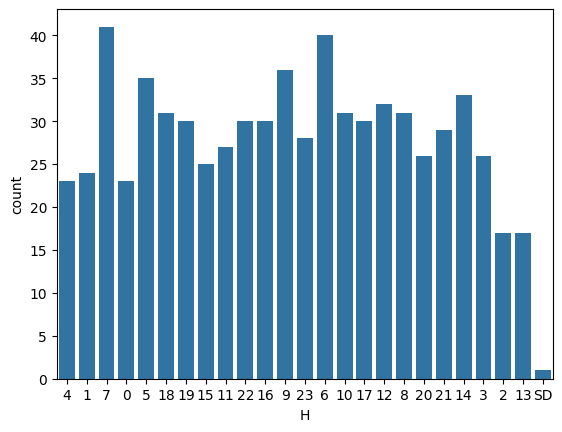

In [16]:
df_homicidios['H'].value_counts()
sns.countplot(data = df_homicidios, x = 'H')

In [17]:
df_homicidios['LugarHecho'].value_counts()

LugarHecho
AV 27 DE FEBRERO Y AV ESCALADA              4
CASTILLO, RAMON S., PRES. AV. Y CALLE 12    2
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.         2
AV LA PLATA Y CNEL GREGORIO POMAR           2
CANTILO, INT. Y UDAONDO, GUILLERMO AV.      2
                                           ..
AV. ALVEAR Y AV. DEL LIBERTADOR             1
AV. PAVON Y TREINTA Y TRES ORIENTALES       1
COLECTORA AV. GRAL. PAZ 5750                1
VIEYTES Y CRUZ                              1
PADRE CARLOS MUJICA 709                     1
Name: count, Length: 683, dtype: int64

In [18]:
df_homicidios['TipoDeCalle'].value_counts()

TipoDeCalle
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [19]:
df_homicidios['Calle'].value_counts()

Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64

In [20]:
df_homicidios['Cruce'].value_counts()

Cruce
PAZ, GRAL. AV.              14
ESCALADA AV.                 9
RIVADAVIA AV.                8
INDEPENDENCIA AV.            7
BALBIN, RICARDO, DR. AV.     6
                            ..
LA RIOJA                     1
TRAFUL                       1
HUMAITA                      1
MANZANARES                   1
HUGO, VICTOR                 1
Name: count, Length: 317, dtype: int64

Columna comuna, no se observa problemas

In [21]:
df_homicidios['Comuna'].value_counts()

Comuna
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Columna X coordenada

In [22]:
df_homicidios['PosX'].value_counts()

PosX
.               12
-58.44451316     5
-58.50073810     4
-58.46743471     4
-58.50877521     4
                ..
-58.39100580     1
-58.37697717     1
-58.45807401     1
-58.42023854     1
-58.37976155     1
Name: count, Length: 605, dtype: int64

In [23]:
df_homicidios['PosY'].value_counts()

PosY
.               12
-34.68475866     5
-34.54979510     4
-34.53476874     4
-34.66977709     4
                ..
-34.58498660     1
-34.59573848     1
-34.63997430     1
-34.64234110     1
-34.58679619     1
Name: count, Length: 605, dtype: int64

Se observan 12 puntos sin información, por lo que  buscaremos complementarlos con los puntos de geolocalización plana para rellenar los datos faltantes

In [24]:
df_homicidios['XYplana'] = df_homicidios['XYplana'].str.replace('Point ','')
df_homicidios['XYplana'].value_counts()

XYplana
(. .)                                14
(101721.59002217 93844.25656649)      5
(96563.66494817 108815.73881056)      4
(99620.34936816 110483.29286598)      4
(95832.05571093 95505.41641999)       4
                                     ..
(106632.70892338 104910.17381357)     1
(107918.77617420 103716.42961253)     1
(100479.14412395 98812.52258620)      1
(103948.02389064 98549.15451723)      1
(107664.16647795 104708.63962087)     1
Name: count, Length: 606, dtype: int64

In [25]:
df_homicidios[df_homicidios['XYplana'] == '(. .)']

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,(. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,(. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,(. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,(. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,(. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,(. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,(. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


In [26]:
df_homicidios[df_homicidios['PosX'] == '.']

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,(. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,(. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,(. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,(. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,(. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,(. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,(. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [27]:
df_homicidios[df_homicidios['PosY'] == '.']

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,(. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,(. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,(. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,(. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,(. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,(. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,(. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,(. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


Se observa que los valores vacíos de las coordenadas X y Y son los mismos que de los de XYplana, e incluso están más completos, por lo que eliminaremos la columna XYplana

In [28]:
df_homicidios = df_homicidios.drop('XYplana', axis = 1)                     # Eliminamos la columna

Continuamos revisando las demás columnas

In [29]:
df_homicidios['Participantes'].value_counts()

Participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

In [30]:
df_homicidios['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [31]:
df_homicidios['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

Hay un registro con Not A Time, por lo que se reemplazará por la hora promedio que se calculó anteriormente

In [32]:
df_homicidios.loc[518,'Hora'] = '05:12:24'
df_homicidios.loc[518,'Hora']

'05:12:24'

In order to analyse the localisation of accidents in more detail, the name of each barrio is added to the data frame. For this purpose, a file with information on each comuna and the barrios within it is included.

In [33]:
barrios = pd.read_csv('data/barrios.csv', sep = ';')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


WKT coordinates of the DataFrame are converted to polygon objects.

In [34]:
from shapely.geometry import Point, Polygon
from shapely.wkt import loads

barrios['WKT'] = barrios['WKT'].apply(lambda x: loads(x))

poligonos = dict(zip(barrios['BARRIO'], barrios['WKT']))                        # A dictionary is created that maps neighbourhood names to corresponding polygons.

In [35]:
df_homicidios['PosX']= df_homicidios['PosX'].replace('.',0)
df_homicidios['PosY'] = df_homicidios['PosY'].replace('.',0)

In [36]:
def determinar_barrio(coordenada):                                              # Enter the value in the form of coordinates (x,y)
    punto = Point(coordenada)

    for barrio, poligono in poligonos.items():
        if punto.within(poligono):
            return barrio

    return "No se encontró el barrio para estas coordenadas."

The function is applied to the dataframe to create and fill the Barrio column.

In [37]:
df_homicidios['barrio'] = df_homicidios.apply(lambda row: determinar_barrio((row['PosX'], row['PosY'])), axis=1)
df_homicidios.head()

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,VILLA RIACHUELO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,No se encontró el barrio para estas coordenadas.
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONSTITUCION
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,VILLA LUGANO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONSTITUCION


#### Here continues the transformation of the Victims Dataframe

In [38]:
df_victimas.describe()

,Fecha,Anio,Mes,Dia
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


You can see that the results of the average year, month and day are similar to the homicide dataframe, because this information is the same as in the homicide dataframe, but here we also have information about the people involved in the accident. It can also be seen that, on average, it is more men who are killed in road traffic accidents than women.

The number of nulls is revised

In [39]:
nulos = t.PorcentajeNulos(df_victimas)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.0,0,717,717
Fecha,0.0,0,717,717
Anio,0.0,0,717,717
Mes,0.0,0,717,717
Dia,0.0,0,717,717
Rol,0.0,0,717,717
Victima,0.0,0,717,717
Sexo,0.0,0,717,717
Edad,0.0,0,717,717
FechaFallecimiento,0.0,0,717,717


It seems that there are no nulls in the dataframe, however we will continue analysing because it is possible that there are no nulls but there are records without values.

In [40]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   idSiniestro         717 non-null    object        
 1   Fecha               717 non-null    datetime64[ns]
 2   Anio                717 non-null    int64         
 3   Mes                 717 non-null    int64         
 4   Dia                 717 non-null    int64         
 5   Rol                 717 non-null    object        
 6   Victima             717 non-null    object        
 7   Sexo                717 non-null    object        
 8   Edad                717 non-null    object        
 9   FechaFallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


The data type of each column is observed, also that there are 716 records and there are 10 columns.  From here we will look for typos or duplicate words. There are also columns whose data type does not correspond to the information they should contain, so we will check their contents one by one and change the data type if necessary.

Column idSiniestro

In [41]:
df_victimas['idSiniestro'].value_counts()

idSiniestro
2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
            ..
2017-0115    1
2017-0116    1
2017-0118    1
2017-0120    1
2021-0096    1
Name: count, Length: 696, dtype: int64

Here you can see several repetitions, but it's ok, since there could be several victims for a single accident.

Columm Victima

In [42]:
df_victimas['Victima'].value_counts()

Victima
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

Column Rol

In [43]:
df_victimas['Rol'].value_counts()

Rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

Column Sexo

In [44]:
df_victimas['Sexo'].value_counts()

Sexo
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

The values for Male are replaced by 1 and for Female by 0.

In [45]:
df_victimas['Sexo'] = df_victimas['Sexo'].map({'MASCULINO': 1, 'FEMENINO': 0})

In [46]:
df_victimas['Sexo'].unique()

array([ 1.,  0., nan])

QUE HAGO CON SD

Column Victima

In [47]:
df_victimas['Victima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL'], dtype=object)

Column Edad (age)

In [48]:
df_victimas['Edad'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

When we look at the Date of Death column, we see that there are 68 records with no information.

In [49]:
df_victimas['FechaFallecimiento'].value_counts()

FechaFallecimiento
SD                     68
2017-02-26 00:00:00     3
2017-01-16 00:00:00     3
2020-12-25 00:00:00     3
2019-12-18 00:00:00     3
                       ..
2018-01-19 00:00:00     1
2018-01-18 00:00:00     1
2018-01-14 00:00:00     1
2018-01-12 00:00:00     1
2022-01-02 00:00:00     1
Name: count, Length: 563, dtype: int64

#### The two dataframes are merged into a new one

Verify that the idSiniestro information is the same in both dataframes.

In [50]:
df_homicidios[df_homicidios['idSiniestro'] == '2017-0113']

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio
235,2017-0113,1,2017-09-11,2017,9,11,06:30:00,6,AV. SANTA FE Y MAIPU,AVENIDA,...,NaN,MAIPU,SANTA FE AV. y MAIPU,1,-58.37697717,-34.59573848,PEATON-PASAJEROS,PEATON,PASAJEROS,RETIRO


In [51]:
df_victimas[df_victimas['idSiniestro'] == '2017-0113']

,idSiniestro,Fecha,Anio,Mes,Dia,Rol,Victima,Sexo,Edad,FechaFallecimiento
244,2017-0113,2017-09-11,2017,9,11,PEATON,PEATON,0.0,76,2017-09-11 00:00:00


Since it has been validated, we join the two dataframes together.

In [52]:
df_accidentes = pd.merge(df_homicidios,df_victimas[['idSiniestro','Rol','Sexo','Edad','FechaFallecimiento']], on = 'idSiniestro', how = 'inner')
df_accidentes

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,VILLA RIACHUELO,CONDUCTOR,1.0,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,No se encontró el barrio para estas coordenadas.,CONDUCTOR,1.0,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONSTITUCION,CONDUCTOR,1.0,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,VILLA LUGANO,CONDUCTOR,1.0,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONSTITUCION,CONDUCTOR,1.0,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PARQUE CHACABUCO,PASAJERO_ACOMPAÑANTE,0.0,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PARQUE AVELLANEDA,PASAJERO_ACOMPAÑANTE,0.0,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,VILLA SANTA RITA,CONDUCTOR,1.0,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,PARQUE AVELLANEDA,CONDUCTOR,1.0,60,2021-12-20 00:00:00


And load data into a new csv file

In [53]:
df_accidentes.to_csv('data/df_accidentes.csv', index = False, encoding='utf-8')

This is the end of this ETL, please click [here](01b_ETL_items.ipynb) to continue.